In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))#danimals))
animalsext = np.concatenate((dualanimalnames,['DS_15','DS_19'],['AE_238','AE_239']))#danimals))

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 0 #July 6th, 2023

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Automated Phases

In [2]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

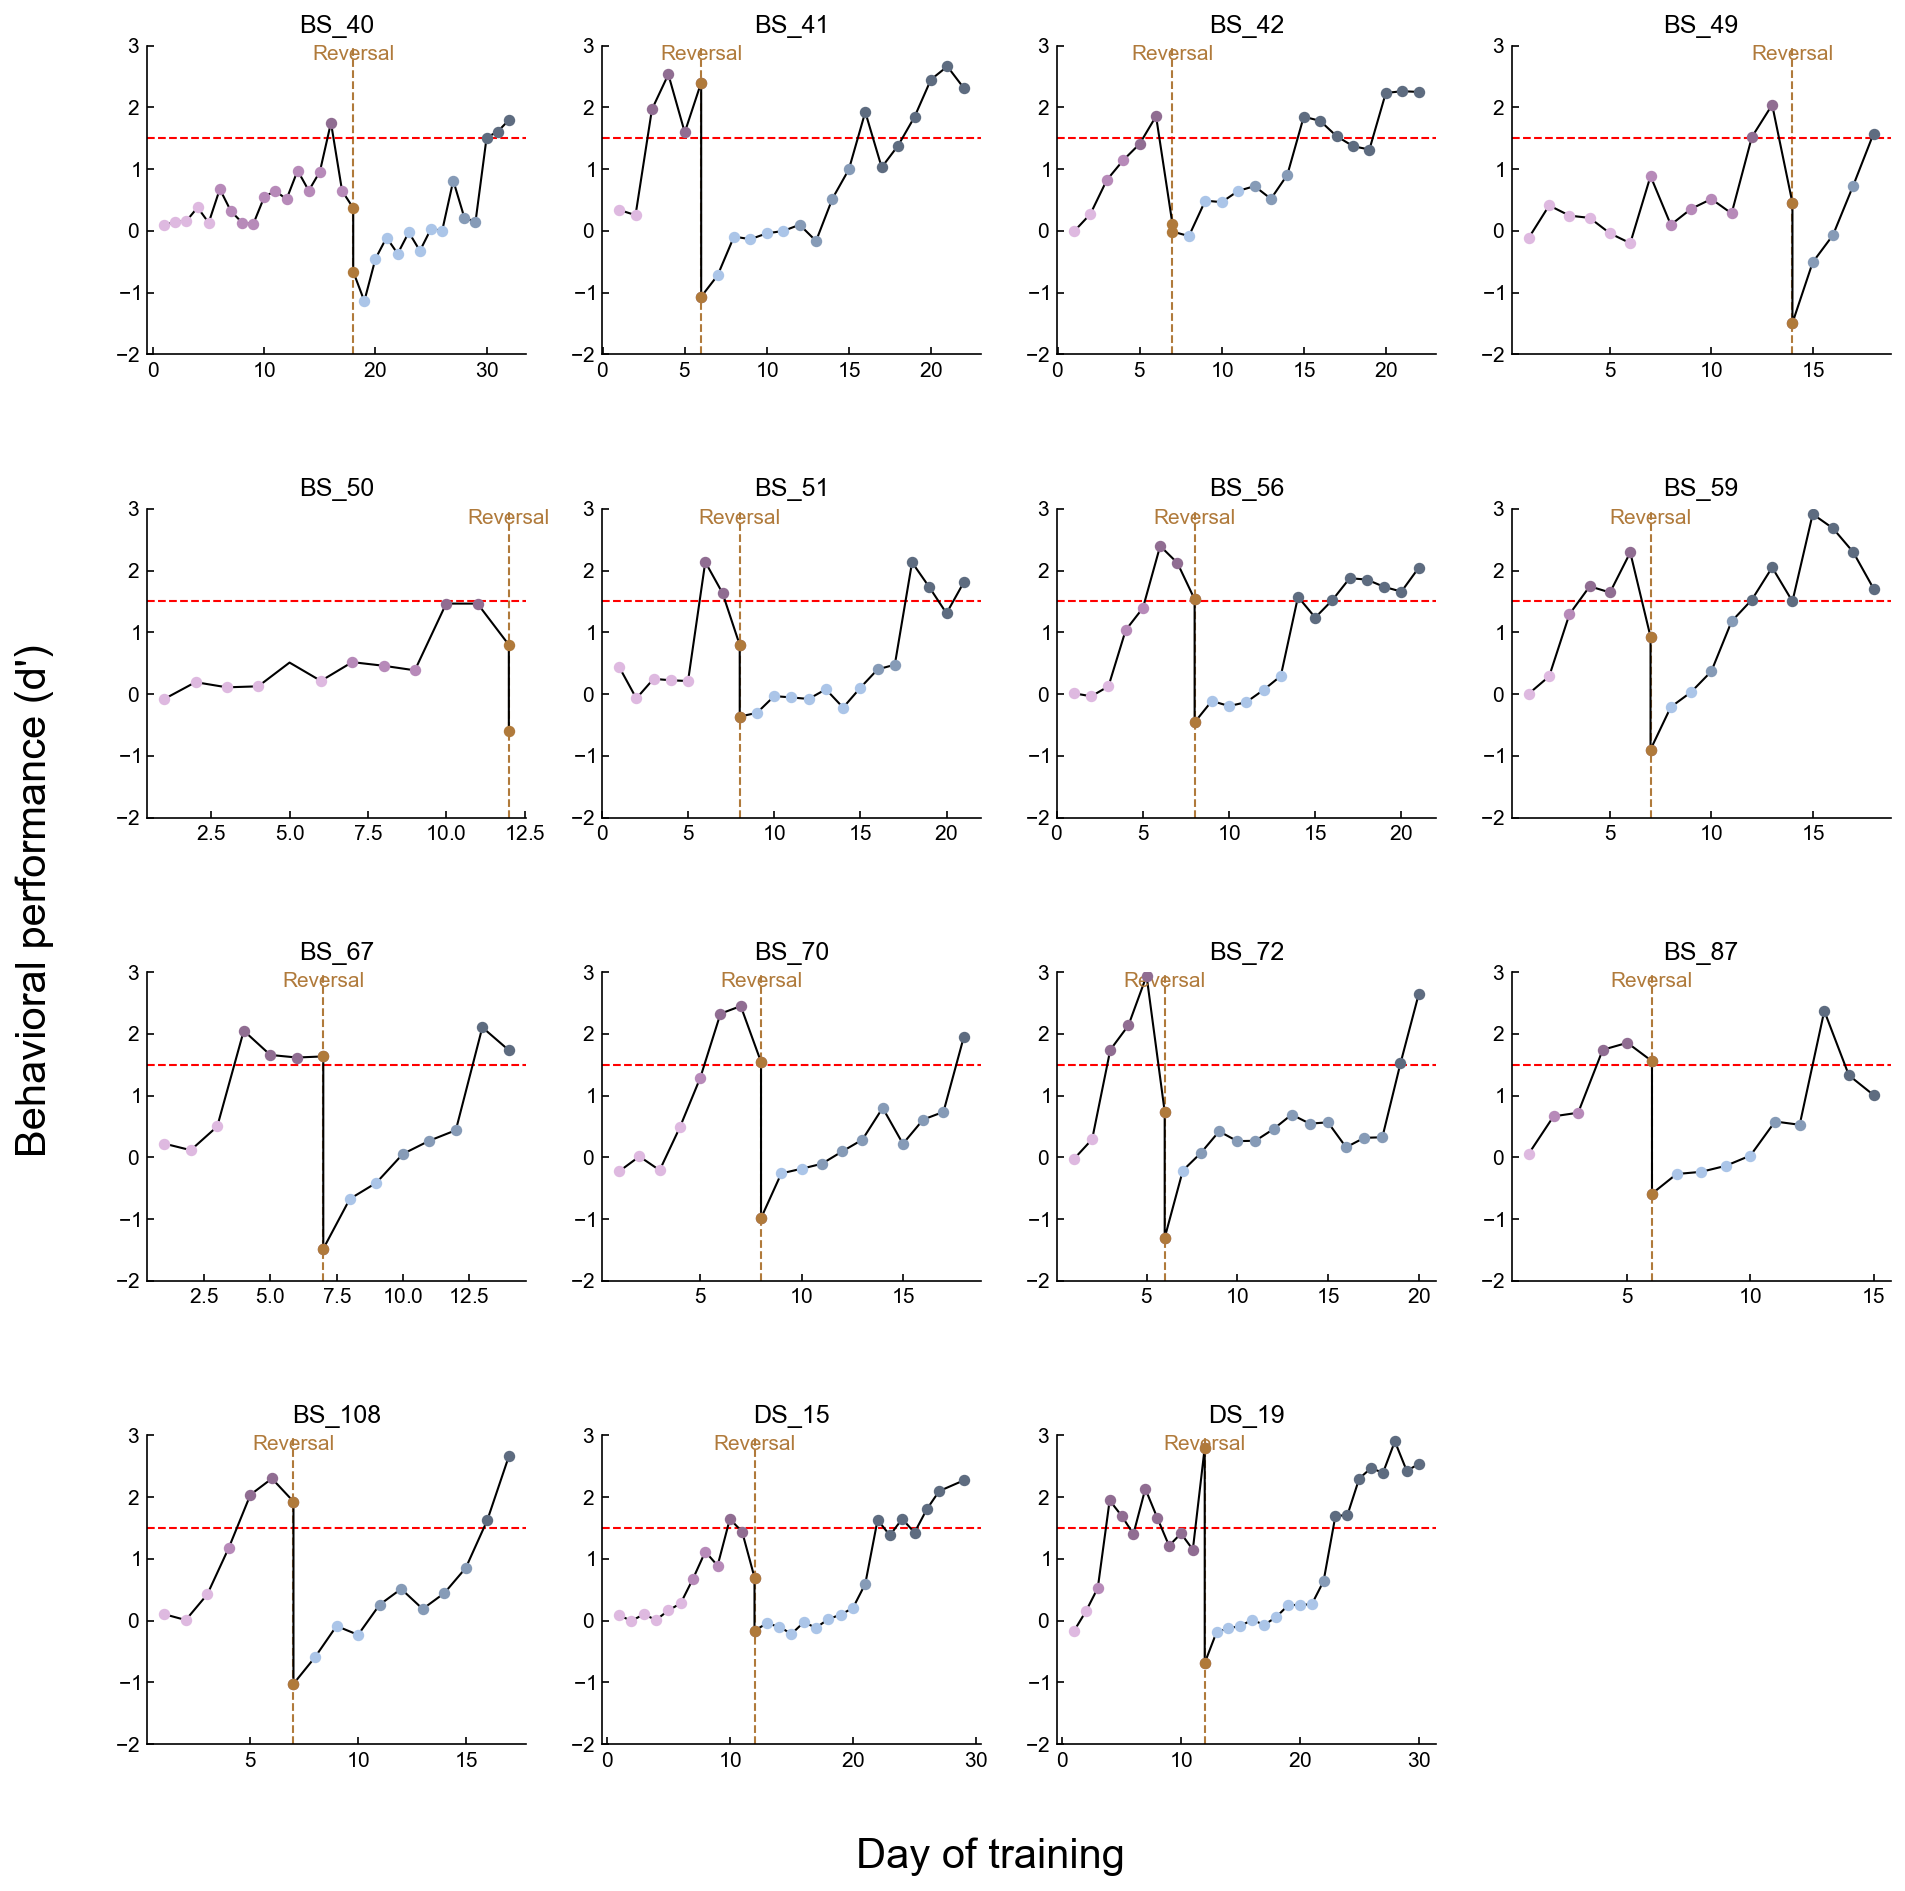

In [3]:
learning_phases,a,b = ilep.calculateLearningPhases(animals,animalBehaviors,plot=True)
#learning_phases,_,_ = ilep.calculateLearningPhases(['AE_238'],animalBehaviors,plot=True)

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

there are 398 trials in AE_239 day 39
there are 116 trials in AE_239 day 20
PC is 0.7758620689655172 and DP is 1.59902324595228
there are 116 trials in AE_239 day 20
PC is 0.7758620689655172 and DP is 1.59902324595228
there are 398 trials in AE_239 day 39


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

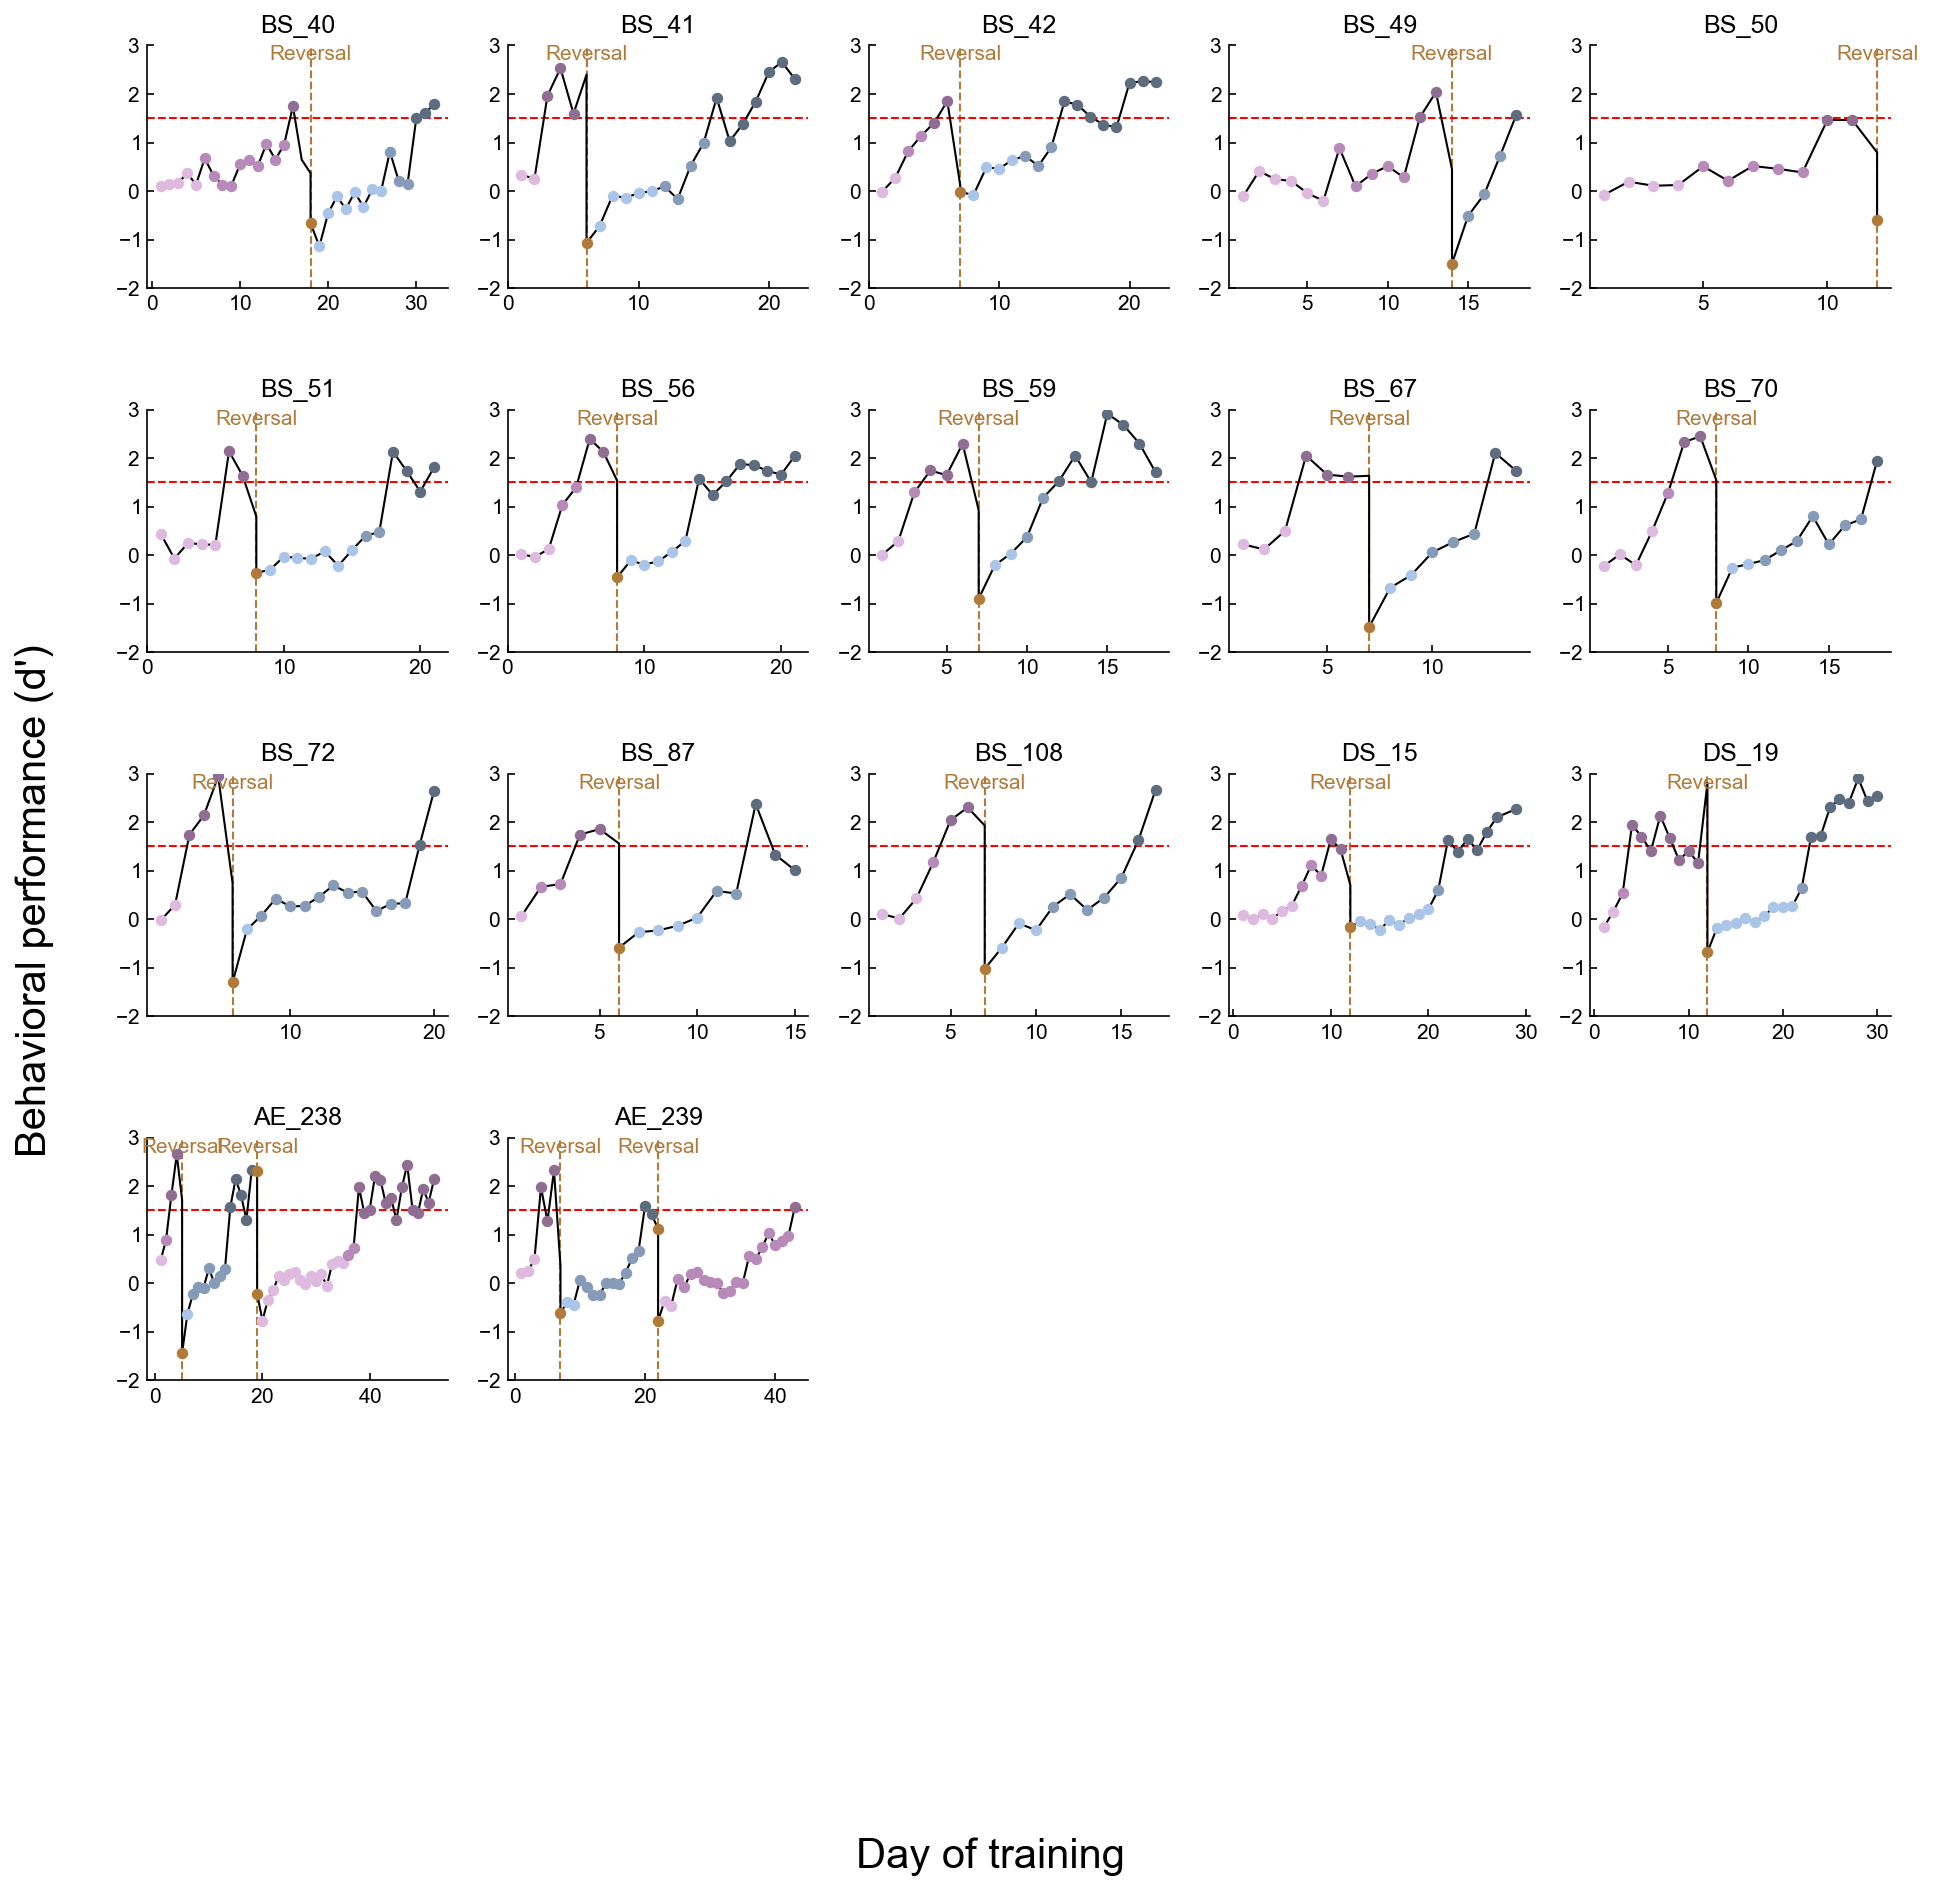

In [4]:
learning_phases,a,b = ilep.calculateLearningPhasesV2(animalsext,animalBehaviors,plot=True)
#learning_phases,_,_ = ilep.calculateLearningPhases(['AE_238'],animalBehaviors,plot=True)
plt.savefig(os.path.join('D:\\\\TempFigures','Automated Learning Phases second reversal.pdf'),transparent=False,facecolor="white")

In [12]:
sessionfile = ilep.getRandomSession(act_directory)
sessionfile.meta

namespace(directory='C:\\Users\\insan\\Desktop\\BS_41 1\\AC\\',
          region='AC',
          animal='BS_41',
          probe=7375,
          date='8/5/2021',
          depth=808,
          task='switch',
          day_of_training=6,
          day_of_recording=1,
          first_reversal_trial=200,
          length_in_samples=53742849.0,
          files=['August 5 2021 Dual BS_41_1001',
                 'August 5 2021 Dual BS_41_1002',
                 'August 5 2021 Dual BS_41_1003',
                 'August 5 2021 Dual BS_41_1004',
                 'August 5 2021 Dual BS_41_1005'],
          condition='reversal',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=1791.4283,
          length_in_minutes=29.857138333333335,
          length_in_trials=371)

In [14]:
sessionfile.responsiveness

{0: {'all_trials': namespace(trials=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                           13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
                           26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
                           39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
                           52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
                           65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
                           78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
                           91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
                          104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
                          117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
                          130, 131, 132, 133, 134, 135, 136, 137, 138, 13

In [5]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in np.concatenate((dualanimalnames,['DS_15','DS_19'])):#np.concatenate((dualanimalnames,danimals)):
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)
        
EnumSession = np.unique(EnumSession)
del EnumClust

100%|██████████| 723/723 [00:08<00:00, 88.01it/s] 


In [6]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and animal in ['DS_15','DS_19']:
            EILphases[idx] = 'pre expert'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal'] and animal in ['DS_15','DS_19']:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        raise e
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 132/132 [00:01<00:00, 99.37it/s] 

errors for: []


In [7]:
reaction_times = dict()
for phase in np.unique(EILphases):
    reaction_times[phase] = []

for idx,session in tqdm(enumerate(np.unique(EnumSession))):
#for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        with open('C://Users/insan/Desktop/trialsToUsePerDay', 'rb') as f:
            trialsPerDayLoaded = pickle.load(f)
    except Exception as e:
        print(e)
        raise e   
    
    try:
        trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
        response_times = sessionfile.trials.response[trials_to_use]
        start_times = sessionfile.trials.starts[trials_to_use]
        
        session_reaction_times = response_times - start_times
        session_reaction_times = session_reaction_times[sessionfile.trials.go[trials_to_use]]
        reaction_times[EILphases[idx]].append(session_reaction_times)
        
    except Exception as e:
        print(f"session {session}")
        print(trials_to_use)
        print(len(sessionfile.trials.response))

77it [00:01, 90.01it/s]

session BS_56_7_AC.pickle
[116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 

100it [00:01, 99.78it/s]

session BS_72_2_AC.pickle
[230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409
 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427
 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463
 464 465 466 467 468 469 

132it [00:01, 78.31it/s]


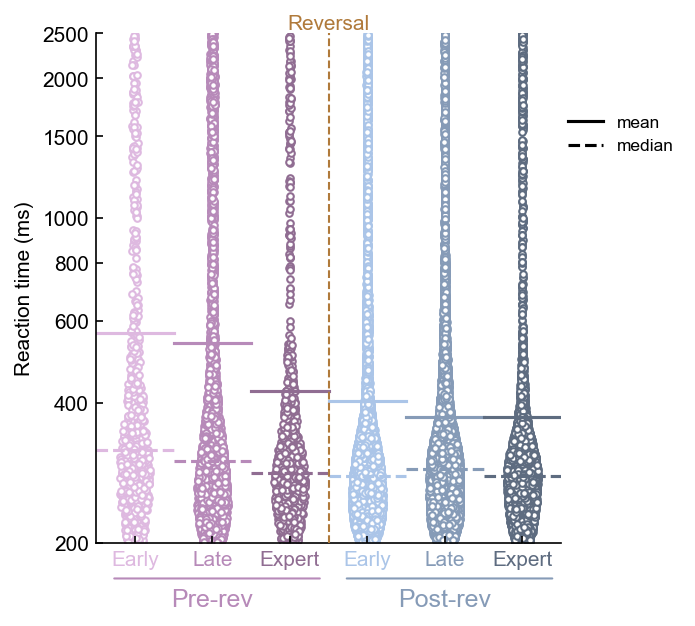

In [106]:
phases = ['pre early','pre late','pre expert','post early','post late','post expert']
labels = ['Early','Late','Expert','Early','Late','Expert']

fig, ax = plt.subplots(figsize=(4,4.5))
for idx,phase in enumerate(phases):
    
    times = np.concatenate(reaction_times[phase])/30
    X = np.zeros_like(times)
    
    _,Y = ilep.violin(X,times,width=0.5)
    X,_ = ilep.violin(X,np.log10(times),width=0.5)
    
    ax.scatter(X+idx,Y,s=10,ec=PHASE_COLORS[idx],fc='white',lw=1)
    ax.plot([idx-0.5,idx+0.5],[np.nanmean(times)]*2,color=PHASE_COLORS[idx])
    ax.plot([idx-0.5,idx+0.5],[np.nanmedian(times)]*2,color=PHASE_COLORS[idx],linestyle='--')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(labels)
[t.set_color(PHASE_COLORS[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]
    
ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 159.8588155862021, 'Pre-rev', ha='center', va='top', fontsize=12,color=PHASE_COLORS[1])
ax.text(xtick_pos_post, 159.8588155862021, 'Post-rev', ha='center', va='top',  fontsize=12,color=PHASE_COLORS[4])
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[1]))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[4]))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [85]:
np.log10(2500)-np.log10(200)

1.0969100130080562

In [90]:
#ax.set_ylim([0,60])
-7.982793779389773/1.5     / 60 # = -0.08869770865988637

(1.0969100130080562 * -0.08869770865988637)

-0.09729340475990074

In [91]:
np.log10(200) + -0.09729340475990074

2.2037365909040805

In [92]:
10**(2.2037365909040805)

159.8588155862021

# Reaction time stats

In [105]:
data_times = SimpleNamespace()
data_times.preearly = np.concatenate(reaction_times['pre early'])
data_times.prelate = np.concatenate(reaction_times['pre late'])
data_times.preexpert = np.concatenate(reaction_times['pre expert'])
data_times.postearly = np.concatenate(reaction_times['post early'])
data_times.postlate = np.concatenate(reaction_times['post late'])
data_times.postexpert = np.concatenate(reaction_times['post expert'])
ilep.nonparametricIndependentStatsCompareToPreearly(data_times)
pass

            Source            SS       DF            MS           F  \
0            phase  5.616063e+10      4.0  1.404016e+10   93.542332   
1          context  4.684446e+10      1.0  4.684446e+10  312.100504   
2  phase * context  8.532601e+09      4.0  2.133150e+09   14.212082   
3         Residual  3.926913e+12  26163.0  1.500941e+08         NaN   

          p-unc       np2  
0  3.925526e-79  0.014100  
1  1.928684e-69  0.011788  
2  1.370023e-11  0.002168  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
11   post-early  baseline  experimental  9.980425e-22  2.495106e-21  0.399912
12  post-expert  baseline  experimental  7.543187e-27  3.771594e-26  0.491016
13    post-late  baseline  experimental  6.720503e-18  1.120084e-17  0.583444
14   pre-expert  baseline  experimental  8.297912e-11  1.037239e-10  0.296336
15     pre-late  baseline  experimental  5.028001e-04  5.028001e-04  0.052466


# Reaction Time 11.2kHz / 5.6kHz

In [8]:
reaction_times_11 = dict()
reaction_times_5 = dict()
for phase in np.unique(EILphases):
    reaction_times_11[phase] = []
    reaction_times_5[phase] = []

for idx,session in tqdm(enumerate(np.unique(EnumSession))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        with open('C://Users/insan/Desktop/trialsToUsePerDay', 'rb') as f:
            trialsPerDayLoaded = pickle.load(f)
    except Exception as e:
        print(e)
        raise e   
    
    try:
        trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
        response_times = sessionfile.trials.response[trials_to_use]
        start_times = sessionfile.trials.starts[trials_to_use]
        
        go_11k_trials = np.logical_and(sessionfile.trials.go,np.equal(sessionfile.trials.freqs,11260))
        go_5k_trials = np.logical_and(sessionfile.trials.go,np.equal(sessionfile.trials.freqs,5648))
        
        session_reaction_times = response_times - start_times
        session_reaction_times_11 = session_reaction_times[go_11k_trials[trials_to_use]]
        session_reaction_times_5 = session_reaction_times[go_5k_trials[trials_to_use]]
        reaction_times_11[EILphases[idx]].append(session_reaction_times_11)
        reaction_times_5[EILphases[idx]].append(session_reaction_times_5)
        
    except Exception as e:
        print(f"session {session}")
        print(trials_to_use)
        print(len(sessionfile.trials.response))

83it [00:01, 97.15it/s]

session BS_56_7_AC.pickle
[116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 

132it [00:01, 77.66it/s]


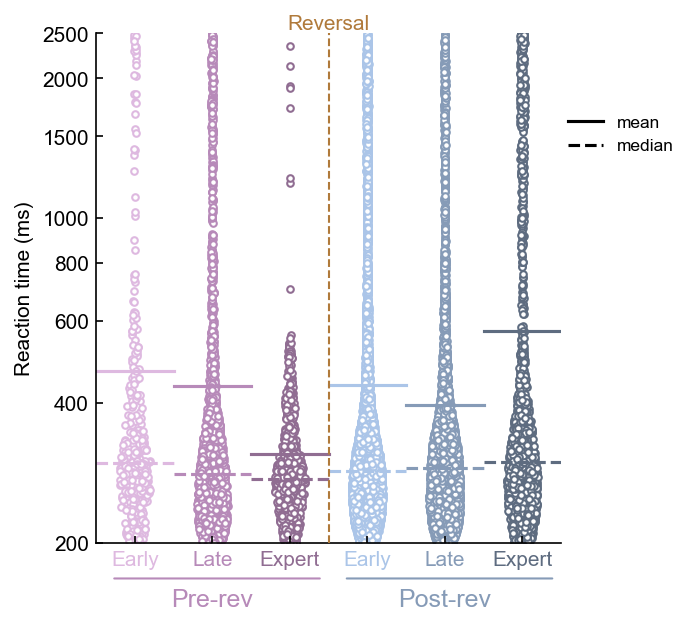

In [9]:
phases = ['pre early','pre late','pre expert','post early','post late','post expert']
labels = ['Early','Late','Expert','Early','Late','Expert']

fig, ax = plt.subplots(figsize=(4,4.5))
for idx,phase in enumerate(phases):
    
    times = np.concatenate(reaction_times_11[phase])/30
    X = np.zeros_like(times)
    
    _,Y = ilep.violin(X,times,width=0.5)
    X,_ = ilep.violin(X,np.log10(times),width=0.5)
    
    ax.scatter(X+idx,Y,s=10,ec=PHASE_COLORS[idx],fc='white',lw=1)
    ax.plot([idx-0.5,idx+0.5],[np.nanmean(times)]*2,color=PHASE_COLORS[idx])
    ax.plot([idx-0.5,idx+0.5],[np.nanmedian(times)]*2,color=PHASE_COLORS[idx],linestyle='--')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(labels)
[t.set_color(PHASE_COLORS[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]
    
ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 159.8588155862021, 'Pre-rev', ha='center', va='top', fontsize=12,color=PHASE_COLORS[1])
ax.text(xtick_pos_post, 159.8588155862021, 'Post-rev', ha='center', va='top',  fontsize=12,color=PHASE_COLORS[4])
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[1]))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[4]))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning 11,2kHz.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning 11,2kHz.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

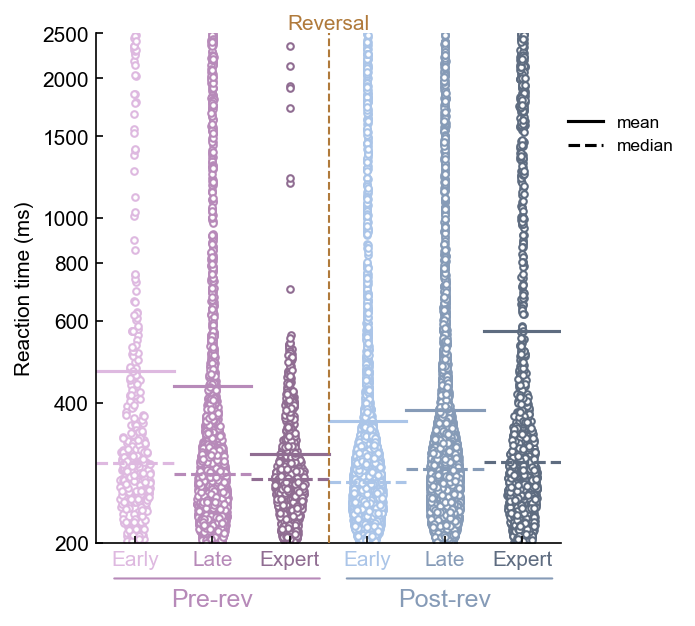

In [13]:
phases = ['pre early','pre late','pre expert','post early','post late','post expert']
labels = ['Early','Late','Expert','Early','Late','Expert']

fig, ax = plt.subplots(figsize=(4,4.5))
for idx,phase in enumerate(phases):
    
    times = np.concatenate(reaction_times_11[phase])/30
    X = np.zeros_like(times)
    
    _,Y = ilep.violin(X,times,width=0.5)
    X,_ = ilep.violin(X,np.log10(times),width=0.5)
    
    ax.scatter(X+idx,Y,s=10,ec=PHASE_COLORS[idx],fc='white',lw=1)
    ax.plot([idx-0.5,idx+0.5],[np.nanmean(times)]*2,color=PHASE_COLORS[idx])
    ax.plot([idx-0.5,idx+0.5],[np.nanmedian(times)]*2,color=PHASE_COLORS[idx],linestyle='--')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(labels)
[t.set_color(PHASE_COLORS[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]
    
ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 159.8588155862021, 'Pre-rev', ha='center', va='top', fontsize=12,color=PHASE_COLORS[1])
ax.text(xtick_pos_post, 159.8588155862021, 'Post-rev', ha='center', va='top',  fontsize=12,color=PHASE_COLORS[4])
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[1]))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[4]))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning 11,2kHz.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning 11,2kHz.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [14]:
data_times_11 = SimpleNamespace()
data_times_11.preearly = np.concatenate(reaction_times_11['pre early'])
data_times_11.prelate = np.concatenate(reaction_times_11['pre late'])
data_times_11.preexpert = np.concatenate(reaction_times_11['pre expert'])
data_times_11.postearly = np.concatenate(reaction_times_11['post early'])
data_times_11.postlate = np.concatenate(reaction_times_11['post late'])
data_times_11.postexpert = np.concatenate(reaction_times_11['post expert'])
ilep.nonparametricIndependentStatsCompareToPreearly(data_times_11)
pass

            Source            SS       DF            MS          F  \
0            phase  3.075183e+10      4.0  7.687958e+09  53.202957   
1          context  3.661606e+09      1.0  3.661606e+09  25.339401   
2  phase * context  8.730918e+09      4.0  2.182729e+09  15.105137   
3         Residual  1.803680e+12  12482.0  1.445025e+08        NaN   

          p-unc       np2  
0  1.591381e-44  0.016764  
1  4.874880e-07  0.002026  
2  2.533758e-12  0.004817  
3           NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
11   post-early  baseline  experimental  3.993998e-08  1.996999e-07  0.292028
12  post-expert  baseline  experimental  4.954005e-01  4.954005e-01 -0.179877
13    post-late  baseline  experimental  1.257708e-02  1.572136e-02  0.232477
14   pre-expert  baseline  experimental  6.145459e-06  1.536365e-05  0.506196
15     pre-late  baseline  experimental  4.011781e-03  6.686302e-03  0.073653


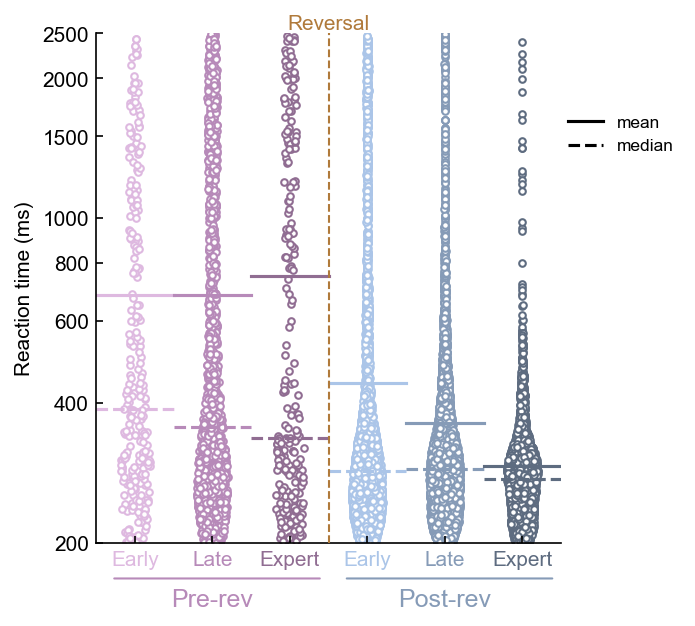

In [12]:
phases = ['pre early','pre late','pre expert','post early','post late','post expert']
labels = ['Early','Late','Expert','Early','Late','Expert']

fig, ax = plt.subplots(figsize=(4,4.5))
for idx,phase in enumerate(phases):
    
    times = np.concatenate(reaction_times_5[phase])/30
    X = np.zeros_like(times)
    
    _,Y = ilep.violin(X,times,width=0.5)
    X,_ = ilep.violin(X,np.log10(times),width=0.5)
    
    ax.scatter(X+idx,Y,s=10,ec=PHASE_COLORS[idx],fc='white',lw=1)
    ax.plot([idx-0.5,idx+0.5],[np.nanmean(times)]*2,color=PHASE_COLORS[idx])
    ax.plot([idx-0.5,idx+0.5],[np.nanmedian(times)]*2,color=PHASE_COLORS[idx],linestyle='--')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(labels)
[t.set_color(PHASE_COLORS[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]
    
ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 159.8588155862021, 'Pre-rev', ha='center', va='top', fontsize=12,color=PHASE_COLORS[1])
ax.text(xtick_pos_post, 159.8588155862021, 'Post-rev', ha='center', va='top',  fontsize=12,color=PHASE_COLORS[4])
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[1]))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[4]))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning 5,6kHz.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning 5,6kHz.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [16]:
data_times_5 = SimpleNamespace()
data_times_5.preearly = np.concatenate(reaction_times_5['pre early'])
data_times_5.prelate = np.concatenate(reaction_times_5['pre late'])
data_times_5.preexpert = np.concatenate(reaction_times_5['pre expert'])
data_times_5.postearly = np.concatenate(reaction_times_5['post early'])
data_times_5.postlate = np.concatenate(reaction_times_5['post late'])
data_times_5.postexpert = np.concatenate(reaction_times_5['post expert'])
ilep.nonparametricIndependentStatsCompareToPreearly(data_times_5)
pass

            Source            SS       DF            MS           F  \
0            phase  1.360817e+11      4.0  3.402043e+10  238.137072   
1          context  4.297860e+10      1.0  4.297860e+10  300.842710   
2  phase * context  2.786259e+10      4.0  6.965649e+09   48.758330   
3         Residual  1.953048e+12  13671.0  1.428607e+08         NaN   

           p-unc       np2  
0  4.945952e-198  0.065138  
1   1.115092e-66  0.021532  
2   8.624307e-41  0.014066  
3            NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
11   post-early  baseline  experimental  1.044041e-18  1.740069e-18  0.548653
12  post-expert  baseline  experimental  9.408356e-41  4.704178e-40  1.809150
13    post-late  baseline  experimental  1.739803e-24  4.349508e-24  1.049583
14   pre-expert  baseline  experimental  5.214939e-01  5.214939e-01 -0.103904
15     pre-late  baseline  experimental  1.644898e-01  2.056123e-01  0.002158


# Reaction Time Target

In [9]:
reaction_times_target = dict()
for phase in np.unique(EILphases):
    reaction_times_target[phase] = []

for idx,session in tqdm(enumerate(np.unique(EnumSession))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        with open('C://Users/insan/Desktop/trialsToUsePerDay', 'rb') as f:
            trialsPerDayLoaded = pickle.load(f)
    except Exception as e:
        print(e)
        raise e   
    
    try:
        trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
        response_times = sessionfile.trials.response[trials_to_use]
        start_times = sessionfile.trials.starts[trials_to_use]
        
        go_target_trials = np.logical_and(sessionfile.trials.go,sessionfile.trials.target)
        
        session_reaction_times = response_times - start_times
        session_reaction_times_target = session_reaction_times[go_target_trials[trials_to_use]]
        reaction_times_target[EILphases[idx]].append(session_reaction_times_target)
        
    except Exception as e:
        print(f"session {session}")
        print(trials_to_use)
        print(len(sessionfile.trials.response))

82it [00:00, 106.41it/s]

session BS_56_7_AC.pickle
[116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 

121it [00:01, 95.93it/s] 


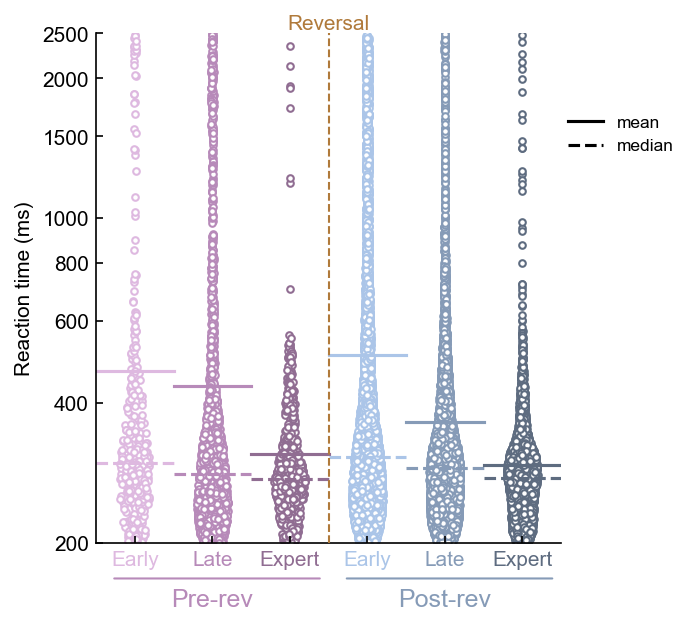

In [12]:
phases = ['pre early','pre late','pre expert','post early','post late','post expert']
labels = ['Early','Late','Expert','Early','Late','Expert']

fig, ax = plt.subplots(figsize=(4,4.5))
for idx,phase in enumerate(phases):
    
    times = np.concatenate(reaction_times_target[phase])/30
    X = np.zeros_like(times)
    
    _,Y = ilep.violin(X,times,width=0.5)
    X,_ = ilep.violin(X,np.log10(times),width=0.5)
    
    ax.scatter(X+idx,Y,s=10,ec=PHASE_COLORS[idx],fc='white',lw=1)
    ax.plot([idx-0.5,idx+0.5],[np.nanmean(times)]*2,color=PHASE_COLORS[idx])
    ax.plot([idx-0.5,idx+0.5],[np.nanmedian(times)]*2,color=PHASE_COLORS[idx],linestyle='--')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(labels)
[t.set_color(PHASE_COLORS[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]
    
ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 159.8588155862021, 'Pre-rev', ha='center', va='top', fontsize=12,color=PHASE_COLORS[1])
ax.text(xtick_pos_post, 159.8588155862021, 'Post-rev', ha='center', va='top',  fontsize=12,color=PHASE_COLORS[4])
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[1]))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color=PHASE_COLORS[4]))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning target V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Reaction time over learning target V'+str(current_version)+'.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [13]:
data_times_target = SimpleNamespace()
data_times_target.preearly = np.concatenate(reaction_times_target['pre early'])
data_times_target.prelate = np.concatenate(reaction_times_target['pre late'])
data_times_target.preexpert = np.concatenate(reaction_times_target['pre expert'])
data_times_target.postearly = np.concatenate(reaction_times_target['post early'])
data_times_target.postlate = np.concatenate(reaction_times_target['post late'])
data_times_target.postexpert = np.concatenate(reaction_times_target['post expert'])
ilep.nonparametricIndependentStatsCompareToPreearly(data_times_target)
pass

            Source            SS       DF            MS           F  \
0            phase  8.604455e+10      4.0  2.151114e+10  167.139287   
1          context  8.550428e+09      1.0  8.550428e+09   66.435929   
2  phase * context  8.159212e+09      4.0  2.039803e+09   15.849056   
3         Residual  2.194882e+12  17054.0  1.287019e+08         NaN   

           p-unc       np2  
0  1.278719e-140  0.037724  
1   3.862940e-16  0.003881  
2   5.917930e-13  0.003704  
3            NaN       NaN  

          phase         A             B         p-unc        p-corr    hedges
11   post-early  baseline  experimental  1.150824e-01  1.150824e-01 -0.079608
12  post-expert  baseline  experimental  1.777753e-10  8.888764e-10  0.862707
13    post-late  baseline  experimental  2.616336e-02  3.270420e-02  0.349387
14   pre-expert  baseline  experimental  6.145459e-06  1.536365e-05  0.506196
15     pre-late  baseline  experimental  4.011781e-03  6.686302e-03  0.073653


In [ ]:
0.006

In [ ]:
0.03

# Reaction time opsin

In [109]:
EnumSessionControl = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in np.concatenate((dualanimalnames,['DS_15','DS_19'])):#np.concatenate((dualanimalnames,danimals)):
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionControl.append(session)
        
EnumSessionControl = np.unique(EnumSessionControl)



EnumSessionOps = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in did_not_learn:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionOps.append(session)
        
EnumSessionOps = np.unique(EnumSessionOps)

100%|██████████| 101/101 [00:00<00:00, 108.00it/s]


In [161]:
reaction_time_per_day_on = dict()
for idx in range(30):
    reaction_time_per_day_on[idx] = []
reaction_time_per_day_off = dict()
for idx in range(30):
    reaction_time_per_day_off[idx] = []
reaction_time_per_day_control = dict()
for idx in range(30):
    reaction_time_per_day_control[idx] = []

            
for idx,(session) in tqdm(enumerate(np.unique(EnumSessionOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    animal = sessionfile.meta.animal
    if animal not in did_not_learn:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    try:
        with open('C://Users/insan/Desktop/trialsToUsePerDay', 'rb') as f:
            trialsPerDayLoaded = pickle.load(f)
    except Exception as e:
        print(e)
        raise e   
    
    try:        
        trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
        response_times = sessionfile.trials.response[trials_to_use]
        start_times = sessionfile.trials.starts[trials_to_use]
        
        go_on = np.logical_and(sessionfile.trials.go[trials_to_use],sessionfile.trials.laser_stimulation[trials_to_use])
        go_off = np.logical_and(sessionfile.trials.go[trials_to_use],np.logical_not(sessionfile.trials.laser_stimulation[trials_to_use]))
        
        session_reaction_times_on = response_times - start_times
        session_reaction_times_on = session_reaction_times_on[go_on]
        reaction_time_per_day_on[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_on)
        
        session_reaction_times_off = response_times - start_times
        session_reaction_times_off = session_reaction_times_off[go_off]
        reaction_time_per_day_off[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_off)
        
    except Exception as e:
        print(f"session {session}")
        print(trials_to_use)
        print(len(sessionfile.trials.response))
    
for idx,(session) in tqdm(enumerate(np.unique(EnumSessionControl))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    animal = sessionfile.meta.animal
    if animal not in dualanimalnames:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    try:
        with open('C://Users/insan/Desktop/trialsToUsePerDay', 'rb') as f:
            trialsPerDayLoaded = pickle.load(f)
    except Exception as e:
        print(e)
        raise e   
    
    try:
        trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
        response_times = sessionfile.trials.response[trials_to_use]
        start_times = sessionfile.trials.starts[trials_to_use]
        
        go = sessionfile.trials.go[trials_to_use]
        
        session_reaction_times_control = response_times - start_times
        session_reaction_times_control = session_reaction_times_control[go]
        reaction_time_per_day_control[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_control)
        
    except Exception as e:
        print(f"session {session}")
        print(trials_to_use)
        print(len(sessionfile.trials.response))
        
    
    
    
    
for day in reaction_time_per_day_on:
    if len(reaction_time_per_day_on[day])>0:
        reaction_times_on = np.concatenate(reaction_time_per_day_on[day]) / 30
    else:
        reaction_times_on = []
    reaction_time_per_day_on[day] = reaction_times_on

for day in reaction_time_per_day_off:
    if len(reaction_time_per_day_off[day])>0:
        reaction_times_off = np.concatenate(reaction_time_per_day_off[day]) / 30
    else:
        reaction_times_off = []
    reaction_time_per_day_off[day] = reaction_times_off
        
for day in reaction_time_per_day_control:
    if len(reaction_time_per_day_control[day])>0:
        reaction_times_control = np.concatenate(reaction_time_per_day_control[day]) / 30
    else:
        reaction_times_control = []
    reaction_time_per_day_control[day] = reaction_times_control

43it [00:00, 83.46it/s] 

session BS_128_4_opto_AC.pickle
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 23

57it [00:00, 79.37it/s]
108it [00:00, 181.47it/s]


<ipython-input-166-9214623e1dc5>:27: RuntimeWarning: Mean of empty slice
  ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmean(reaction_times_control)]*2,color='k')
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-166-9214623e1dc5>:30: RuntimeWarning: Mean of empty slice
  ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmean(reaction_times_off)]*2,color=GOOD_GREY)
<ipython-input-166-9214623e1dc5>:33: RuntimeWarning: Mean of empty slice
  ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmean(reaction_times_on)]*2,color=LASER_COLOR)


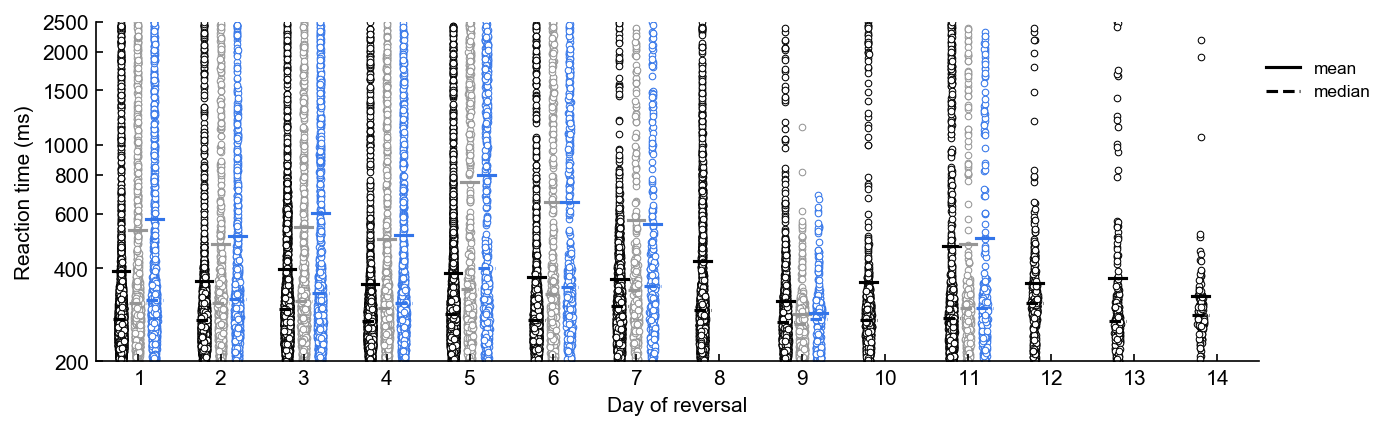

In [166]:
fig, ax = plt.subplots(figsize=(10,3))

for day in reaction_time_per_day_control:
    
    reaction_times_on = reaction_time_per_day_on[day]
    reaction_times_off = reaction_time_per_day_off[day]
    reaction_times_control = reaction_time_per_day_control[day]
    
    X = np.zeros_like(reaction_times_control)+day
    _,Y = ilep.violin(X,reaction_times_control)
    X,_ = ilep.violin(X,np.log10(reaction_times_control),width=0.1)
    X -= 0.2
    ax.scatter(X,Y,s=10,fc='white',ec='k',lw=0.5)
    
    X = np.zeros_like(reaction_times_off)+day
    _,Y = ilep.violin(X,reaction_times_off)
    X,_ = ilep.violin(X,np.log10(reaction_times_off),width=0.1)
    #X -= 0.2
    ax.scatter(X,Y,s=10,fc='white',ec=GOOD_GREY,lw=0.5)
    
    X = np.zeros_like(reaction_times_on)+day
    _,Y = ilep.violin(X,reaction_times_on)
    X,_ = ilep.violin(X,np.log10(reaction_times_on),width=0.1)
    X += 0.2
    ax.scatter(X,Y,s=10,fc='white',ec=LASER_COLOR,lw=0.5)
    
    ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmean(reaction_times_control)]*2,color='k')
    ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmedian(reaction_times_control)]*2,color='k',linestyle='--')
    
    ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmean(reaction_times_off)]*2,color=GOOD_GREY)
    ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmedian(reaction_times_off)]*2,color=GOOD_GREY,linestyle='--')
    
    ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmean(reaction_times_on)]*2,color=LASER_COLOR)
    ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmedian(reaction_times_on)]*2,color=LASER_COLOR,linestyle='--')

ax.set_xlim([0.5,14.5])
ax.set_xticks(range(1,14+1))
ax.set_xlabel('Day of reversal')

ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin reaction time over learning.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin reaction time over learning.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [165]:
days_to_check = []
for day in range(1,14+1):
    if len(reaction_time_per_day_on[day]) > 0 and len(reaction_time_per_day_off[day]) > 0 and len(reaction_time_per_day_control[day]) > 0:
        days_to_check.append(day)
print(days_to_check)


day = np.concatenate([np.concatenate([len(reaction_time_per_day_on[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_off[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_control[day])*[str(day)] for day in days_to_check])])

context = np.concatenate([np.concatenate([len(reaction_time_per_day_on[day])*['opsin_on'] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_off[day])*['opsin_off'] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_control[day])*['control'] for day in days_to_check])])

times = np.concatenate([np.concatenate([reaction_time_per_day_on[day] for day in days_to_check]),
                    np.concatenate([reaction_time_per_day_off[day] for day in days_to_check]),
                    np.concatenate([reaction_time_per_day_control[day] for day in days_to_check])])

df = pd.DataFrame({"day": day, "context": context, "times": times})
print(df)

### Anova ###
anova = pg.anova(data=df, dv='times', between=['day','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='times', between=['day','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "day * context"][["day","A", "B", "p-unc", "p-corr", "hedges"]])

[1, 2, 3, 4, 5, 6, 7, 9, 11]
      day   context        times
0       1  opsin_on   294.766667
1       1  opsin_on   413.033333
2       1  opsin_on   242.666667
3       1  opsin_on   206.033333
4       1  opsin_on  1732.666667
...    ..       ...          ...
24677  11   control   228.833333
24678  11   control   416.966667
24679  11   control   275.566667
24680  11   control   270.900000
24681  11   control   206.166667

[24682 rows x 3 columns]
          Source            SS       DF            MS           F  \
0            day  6.363335e+07      8.0  7.954169e+06   44.792549   
1        context  1.838500e+08      2.0  9.192498e+07  517.659874   
2  day * context  6.870990e+07     16.0  4.294369e+06   24.183008   
3       Residual  4.378184e+09  24655.0  1.775779e+05         NaN   

           p-unc       np2  
0   5.221231e-72  0.014326  
1  5.961316e-221  0.040300  
2   8.043373e-72  0.015451  
3            NaN       NaN  

   day          A          B         p-unc        p-corr 

# Reaction time opsin -- 11.2kHz and 5.6kHz

In [20]:
EnumSessionControl = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in np.concatenate((dualanimalnames,['DS_15','DS_19'])):#np.concatenate((dualanimalnames,danimals)):
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionControl.append(session)
        
EnumSessionControl = np.unique(EnumSessionControl)



EnumSessionOps = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in did_not_learn:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionOps.append(session)
        
EnumSessionOps = np.unique(EnumSessionOps)

100%|██████████| 101/101 [00:01<00:00, 75.57it/s]


In [46]:
reaction_time_per_day_on_11 = dict()
reaction_time_per_day_on_5 = dict()
for idx in range(30):
    reaction_time_per_day_on_11[idx] = []
    reaction_time_per_day_on_5[idx] = []
reaction_time_per_day_off_11 = dict()
reaction_time_per_day_off_5 = dict()
for idx in range(30):
    reaction_time_per_day_off_11[idx] = []
    reaction_time_per_day_off_5[idx] = []
reaction_time_per_day_control_11 = dict()
reaction_time_per_day_control_5 = dict()
for idx in range(30):
    reaction_time_per_day_control_11[idx] = []
    reaction_time_per_day_control_5[idx] = []

            
for idx,(session) in tqdm(enumerate(np.unique(EnumSessionOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    animal = sessionfile.meta.animal
    if animal not in did_not_learn:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    try:
        with open('C://Users/insan/Desktop/trialsToUsePerDay', 'rb') as f:
            trialsPerDayLoaded = pickle.load(f)
    except Exception as e:
        print(e)
        raise e   
    
    try:        
        trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
        response_times = sessionfile.trials.response[trials_to_use]
        start_times = sessionfile.trials.starts[trials_to_use]
        
        go_on = np.logical_and(sessionfile.trials.go,sessionfile.trials.laser_stimulation)
        go_off = np.logical_and(sessionfile.trials.go,np.logical_not(sessionfile.trials.laser_stimulation))
        
        go_on_11k_trials = np.logical_and(go_on,np.equal(sessionfile.trials.freqs,11260))
        go_on_5k_trials = np.logical_and(go_on,np.equal(sessionfile.trials.freqs,5648))
        go_off_11k_trials = np.logical_and(go_off,np.equal(sessionfile.trials.freqs,11260))
        go_off_5k_trials = np.logical_and(go_off,np.equal(sessionfile.trials.freqs,5648))
        
        go_on_11k_trials = go_on_11k_trials[trials_to_use]
        go_on_5k_trials = go_on_5k_trials[trials_to_use]
        go_off_11k_trials = go_off_11k_trials[trials_to_use]
        go_off_5k_trials = go_off_5k_trials[trials_to_use]
        
        ####################################################################################################################################################################################
        
        session_reaction_times_on_11k = response_times - start_times
        session_reaction_times_on_11k = session_reaction_times_on_11k[go_on_11k_trials]
        reaction_time_per_day_on_11[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_on_11k)
        
        session_reaction_times_on_5k = response_times - start_times
        session_reaction_times_on_5k = session_reaction_times_on_5k[go_on_5k_trials]
        reaction_time_per_day_on_5[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_on_5k)
        
        session_reaction_times_off_11k = response_times - start_times
        session_reaction_times_off_11k = session_reaction_times_off_11k[go_off_11k_trials]
        reaction_time_per_day_off_11[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_off_11k)
        
        session_reaction_times_off_5k = response_times - start_times
        session_reaction_times_off_5k = session_reaction_times_off_5k[go_off_5k_trials]
        reaction_time_per_day_off_5[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_off_5k)
        
    except Exception as e:
        print(f"session {session}")
        print(f"using trials {trials_to_use}")
        print(f"{len(sessionfile.trials.response)} trials present")
        print(f"error is {e}")
    
for idx,(session) in tqdm(enumerate(np.unique(EnumSessionControl))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    animal = sessionfile.meta.animal
    if animal not in dualanimalnames:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    try:
        with open('C://Users/insan/Desktop/trialsToUsePerDay', 'rb') as f:
            trialsPerDayLoaded = pickle.load(f)
    except Exception as e:
        print(e)
        raise e   
    
    try:
        trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
        response_times = sessionfile.trials.response[trials_to_use]
        start_times = sessionfile.trials.starts[trials_to_use]
        
        go = sessionfile.trials.go
        go_11k_trials = np.logical_and(go,np.equal(sessionfile.trials.freqs,11260))
        go_5k_trials = np.logical_and(go,np.equal(sessionfile.trials.freqs,5648))
        go_11k_trials = go_11k_trials[trials_to_use]
        go_5k_trials = go_5k_trials[trials_to_use]
        
        session_reaction_times_control_11 = response_times - start_times
        session_reaction_times_control_11 = session_reaction_times_control_11[go_11k_trials]
        reaction_time_per_day_control_11[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_control_11)

        session_reaction_times_control_5 = response_times - start_times
        session_reaction_times_control_5 = session_reaction_times_control_5[go_5k_trials]
        reaction_time_per_day_control_5[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(session_reaction_times_control_5)
        
    except Exception as e:
        print(f"session {session}")
        print(trials_to_use)
        print(len(sessionfile.trials.response))
        raise e
        
    
    
rxtlist = [reaction_time_per_day_on_11,reaction_time_per_day_on_5,reaction_time_per_day_off_11,reaction_time_per_day_off_5,reaction_time_per_day_control_11,reaction_time_per_day_control_5]
for idx,reaction_time_per_day in enumerate(rxtlist):
    for day in reaction_time_per_day:
        if len(reaction_time_per_day[day])>0:
            reaction_times = np.concatenate(reaction_time_per_day[day]) / 30
        else:
            reaction_times = []
        reaction_time_per_day[day] = reaction_times
    rxtlist[idx] = reaction_time_per_day
reaction_time_per_day_on_11,reaction_time_per_day_on_5,reaction_time_per_day_off_11,reaction_time_per_day_off_5,reaction_time_per_day_control_11,reaction_time_per_day_control_5 = rxtlist

57it [00:00, 96.75it/s] 
108it [00:00, 176.43it/s]


<ipython-input-53-88a1fb5fa044>:27: RuntimeWarning: Mean of empty slice
  ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmean(reaction_times_control)]*2,color='k')
<ipython-input-53-88a1fb5fa044>:30: RuntimeWarning: Mean of empty slice
  ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmean(reaction_times_off)]*2,color=GOOD_GREY)
<ipython-input-53-88a1fb5fa044>:33: RuntimeWarning: Mean of empty slice
  ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmean(reaction_times_on)]*2,color=LASER_COLOR)


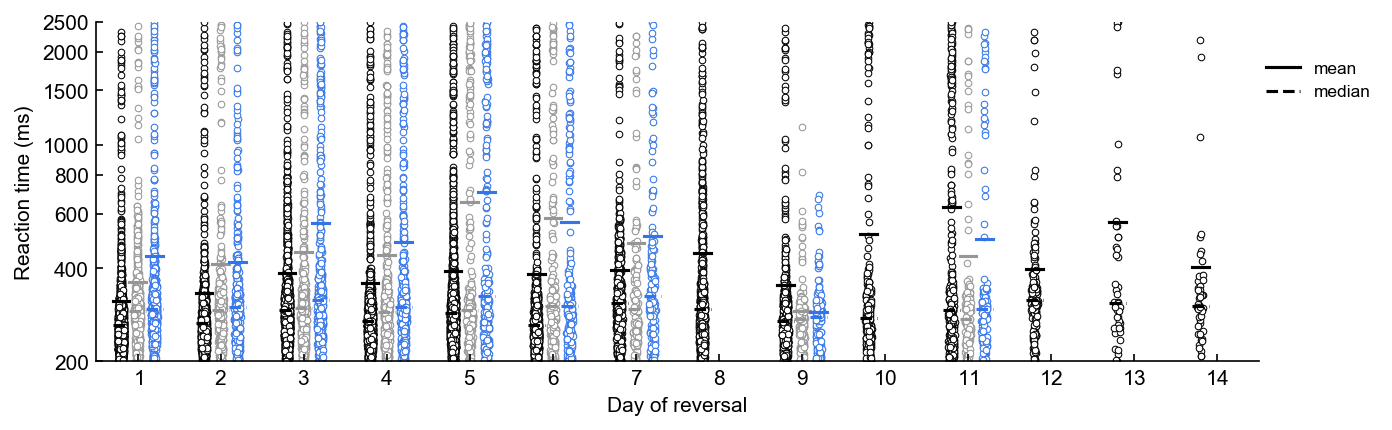

In [53]:
fig, ax = plt.subplots(figsize=(10,3))

for day in reaction_time_per_day_control_11:
    
    reaction_times_on = reaction_time_per_day_on_11[day]
    reaction_times_off = reaction_time_per_day_off_11[day]
    reaction_times_control = reaction_time_per_day_control_11[day]
    
    X = np.zeros_like(reaction_times_control)+day
    _,Y = ilep.violin(X,reaction_times_control)
    X,_ = ilep.violin(X,np.log10(reaction_times_control),width=0.1)
    X -= 0.2
    ax.scatter(X,Y,s=10,fc='white',ec='k',lw=0.5)
    
    X = np.zeros_like(reaction_times_off)+day
    _,Y = ilep.violin(X,reaction_times_off)
    X,_ = ilep.violin(X,np.log10(reaction_times_off),width=0.1)
    #X -= 0.2
    ax.scatter(X,Y,s=10,fc='white',ec=GOOD_GREY,lw=0.5)
    
    X = np.zeros_like(reaction_times_on)+day
    _,Y = ilep.violin(X,reaction_times_on)
    X,_ = ilep.violin(X,np.log10(reaction_times_on),width=0.1)
    X += 0.2
    ax.scatter(X,Y,s=10,fc='white',ec=LASER_COLOR,lw=0.5)
    
    ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmean(reaction_times_control)]*2,color='k')
    ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmedian(reaction_times_control)]*2,color='k',linestyle='--')
    
    ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmean(reaction_times_off)]*2,color=GOOD_GREY)
    ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmedian(reaction_times_off)]*2,color=GOOD_GREY,linestyle='--')
    
    ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmean(reaction_times_on)]*2,color=LASER_COLOR)
    ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmedian(reaction_times_on)]*2,color=LASER_COLOR,linestyle='--')

ax.set_xlim([0.5,14.5])
ax.set_xticks(range(1,14+1))
ax.set_xlabel('Day of reversal')

ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin reaction time 11,2kHz over learning.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin reaction time 11,2kHz over learning.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [55]:
days_to_check = []
for day in range(1,14+1):
    if len(reaction_time_per_day_on_11[day]) > 0 and len(reaction_time_per_day_off_11[day]) > 0 and len(reaction_time_per_day_control_11[day]) > 0:
        days_to_check.append(day)
print(days_to_check)


day = np.concatenate([np.concatenate([len(reaction_time_per_day_on_11[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_off_11[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_control_11[day])*[str(day)] for day in days_to_check])])

context = np.concatenate([np.concatenate([len(reaction_time_per_day_on_11[day])*['opsin_on'] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_off_11[day])*['opsin_off'] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_control_11[day])*['control'] for day in days_to_check])])

times = np.concatenate([np.concatenate([reaction_time_per_day_on_11[day] for day in days_to_check]),
                    np.concatenate([reaction_time_per_day_off_11[day] for day in days_to_check]),
                    np.concatenate([reaction_time_per_day_control_11[day] for day in days_to_check])])

df = pd.DataFrame({"day": day, "context": context, "times": times})
print(df)

### Anova ###
anova = pg.anova(data=df, dv='times', between=['day','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='times', between=['day','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "day * context"][["day","A", "B", "p-unc", "p-corr", "hedges"]])

[1, 2, 3, 4, 5, 6, 7, 9, 11]
      day   context        times
0       1  opsin_on   256.133333
1       1  opsin_on   284.633333
2       1  opsin_on   511.533333
3       1  opsin_on   473.200000
4       1  opsin_on   316.233333
...    ..       ...          ...
11609  11   control   275.733333
11610  11   control   493.766667
11611  11   control  1990.300000
11612  11   control   665.266667
11613  11   control  1123.666667

[11614 rows x 3 columns]
          Source            SS       DF            MS           F  \
0            day  4.002000e+07      8.0  5.002500e+06   31.857189   
1        context  3.268653e+07      2.0  1.634326e+07  104.078057   
2  day * context  3.038550e+07     16.0  1.899093e+06   12.093909   
3       Residual  1.819494e+09  11587.0  1.570289e+05         NaN   

          p-unc       np2  
0  6.001414e-50  0.021522  
1  1.587383e-45  0.017648  
2  3.233019e-32  0.016426  
3           NaN       NaN  

   day          A          B         p-unc        p-corr    he

<ipython-input-54-ce3a5338c5e9>:27: RuntimeWarning: Mean of empty slice
  ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmean(reaction_times_control)]*2,color='k')
<ipython-input-54-ce3a5338c5e9>:30: RuntimeWarning: Mean of empty slice
  ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmean(reaction_times_off)]*2,color=GOOD_GREY)
<ipython-input-54-ce3a5338c5e9>:33: RuntimeWarning: Mean of empty slice
  ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmean(reaction_times_on)]*2,color=LASER_COLOR)


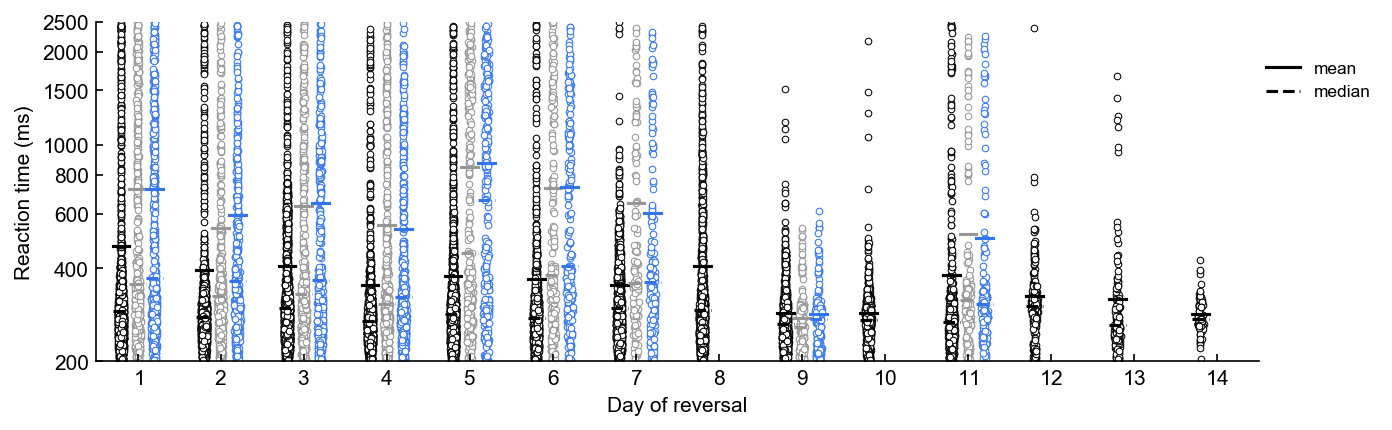

In [54]:
fig, ax = plt.subplots(figsize=(10,3))

for day in reaction_time_per_day_control_5:
    
    reaction_times_on = reaction_time_per_day_on_5[day]
    reaction_times_off = reaction_time_per_day_off_5[day]
    reaction_times_control = reaction_time_per_day_control_5[day]
    
    X = np.zeros_like(reaction_times_control)+day
    _,Y = ilep.violin(X,reaction_times_control)
    X,_ = ilep.violin(X,np.log10(reaction_times_control),width=0.1)
    X -= 0.2
    ax.scatter(X,Y,s=10,fc='white',ec='k',lw=0.5)
    
    X = np.zeros_like(reaction_times_off)+day
    _,Y = ilep.violin(X,reaction_times_off)
    X,_ = ilep.violin(X,np.log10(reaction_times_off),width=0.1)
    #X -= 0.2
    ax.scatter(X,Y,s=10,fc='white',ec=GOOD_GREY,lw=0.5)
    
    X = np.zeros_like(reaction_times_on)+day
    _,Y = ilep.violin(X,reaction_times_on)
    X,_ = ilep.violin(X,np.log10(reaction_times_on),width=0.1)
    X += 0.2
    ax.scatter(X,Y,s=10,fc='white',ec=LASER_COLOR,lw=0.5)
    
    ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmean(reaction_times_control)]*2,color='k')
    ax.plot([day-0.2-0.1,day-0.2+0.1],[np.nanmedian(reaction_times_control)]*2,color='k',linestyle='--')
    
    ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmean(reaction_times_off)]*2,color=GOOD_GREY)
    ax.plot([day-0.0-0.1,day-0.0+0.1],[np.nanmedian(reaction_times_off)]*2,color=GOOD_GREY,linestyle='--')
    
    ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmean(reaction_times_on)]*2,color=LASER_COLOR)
    ax.plot([day+0.2-0.1,day+0.2+0.1],[np.nanmedian(reaction_times_on)]*2,color=LASER_COLOR,linestyle='--')

ax.set_xlim([0.5,14.5])
ax.set_xticks(range(1,14+1))
ax.set_xlabel('Day of reversal')

ax.set_ylim([200,2500])
ax.set_yscale('log',subs=[])
ax.set_ylabel('Reaction time (ms)')
ax.set_yticks([200,400,600,800,1000,1500,2000,2500])
ax.set_yticklabels([200,400,600,800,1000,1500,2000,2500])

ax.plot([],[],color='k',label='mean')
ax.plot([],[],color='k',label='median',linestyle='--')
lgd = ax.legend(frameon=False,loc=(1,0.75))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin reaction time 5,6kHz over learning.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin reaction time 5,6kHz over learning.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [56]:
days_to_check = []
for day in range(1,14+1):
    if len(reaction_time_per_day_on_5[day]) > 0 and len(reaction_time_per_day_off_5[day]) > 0 and len(reaction_time_per_day_control_5[day]) > 0:
        days_to_check.append(day)
print(days_to_check)


day = np.concatenate([np.concatenate([len(reaction_time_per_day_on_5[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_off_5[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_control_5[day])*[str(day)] for day in days_to_check])])

context = np.concatenate([np.concatenate([len(reaction_time_per_day_on_5[day])*['opsin_on'] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_off_5[day])*['opsin_off'] for day in days_to_check]),
                    np.concatenate([len(reaction_time_per_day_control_5[day])*['control'] for day in days_to_check])])

times = np.concatenate([np.concatenate([reaction_time_per_day_on_5[day] for day in days_to_check]),
                    np.concatenate([reaction_time_per_day_off_5[day] for day in days_to_check]),
                    np.concatenate([reaction_time_per_day_control_5[day] for day in days_to_check])])

df = pd.DataFrame({"day": day, "context": context, "times": times})
print(df)

### Anova ###
anova = pg.anova(data=df, dv='times', between=['day','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='times', between=['day','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "day * context"][["day","A", "B", "p-unc", "p-corr", "hedges"]])

[1, 2, 3, 4, 5, 6, 7, 9, 11]
      day   context        times
0       1  opsin_on   294.766667
1       1  opsin_on   413.033333
2       1  opsin_on   242.666667
3       1  opsin_on   206.033333
4       1  opsin_on  1732.666667
...    ..       ...          ...
13229  11   control   228.833333
13230  11   control   416.966667
13231  11   control   275.566667
13232  11   control   270.900000
13233  11   control   206.166667

[13234 rows x 3 columns]
          Source            SS       DF            MS           F  \
0            day  6.695782e+07      8.0  8.369728e+06   44.400611   
1        context  1.807858e+08      2.0  9.039291e+07  479.525810   
2  day * context  4.731427e+07     16.0  2.957142e+06   15.687355   
3       Residual  2.489583e+09  13207.0  1.885048e+05         NaN   

           p-unc       np2  
0   6.770363e-71  0.026191  
1  9.095060e-202  0.067701  
2   9.233246e-44  0.018650  
3            NaN       NaN  

   day          A          B         p-unc        p-corr 

In [57]:
animalBehaviors['AE_238'].reversal
animalBehaviors['AE_238'].second_reversal

5

In [58]:
animalBehaviors['AE_238'].second_reversal

19